In [1]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

In [161]:
class SOM : 
    def __init__(self,output_shape,n_features):
        self.weights = np.random.normal(0,1,size=(*output_shape,n_features))
        self.W_U = np.zeros(shape=self.weights.shape)
        self.radius = 1
        self.lr = 0.1
        self.output_shape = output_shape
        self.n_features = n_features
        
    def update_weights(self,x,step) : 
        u,v = self.findBMU(x)
        if(self.radius < 0.001) :
            BMU_pre_update = self.weights[u,v,:]
            self.W_U[u,v,:] = self.lr * distance_func * (x-self.weights[u,v,:])
        else : 
            for i in range(max(0,u-step),min(u+step,self.output_shape[1])) : 
                for j in range(max(0,v-step),min(v+step,self.output_shape[0])) :
                    pre_update = self.weights[i,j,:] 
                    distance_from_BMU = np.linalg.norm((i-u,j-v))
                    distance_func = np.exp(-distance_from_BMU/(2*(self.radius**2)))
                    o=self.lr * distance_func * (x-self.weights[i,j,:])
                    self.W_U[i,j,:] += self.lr * distance_func * (x-self.weights[i,j,:])
                    
                    
        
    def findBMU(self,x) : 
        distances = np.apply_along_axis(np.linalg.norm,2,self.weights - x)
        return np.unravel_index(np.argmax(distances),self.output_shape)
        
    def update_radius(self,epoch,decay_rate) : 
        self.radius = self.radius * np.exp(-epoch*decay_rate)
    
    def update_lr(self,epoch,decay_rate) : 
        self.lr = self.lr * np.exp(-epoch*decay_rate)
    
    def train(self,X,epochs,lr=0.01,lr_decay_rate=0.01,radius=1,radius_decay_rate=0.01,step=2) : 
        for epoch in range(epochs) : 
            print("epoch :",epoch)
            for sample in X : 
                u,v=self.findBMU(sample)
                pretrain_w = self.weights[u,v,:]
                self.update_weights(sample,step)
            self.update_radius(epoch,radius_decay_rate)
            self.update_lr(epoch,lr_decay_rate)
    def predict(self,X) : 
        labels = []
        for sample in X :
            labels.append(self.findBMU(sample))
        return labels
            

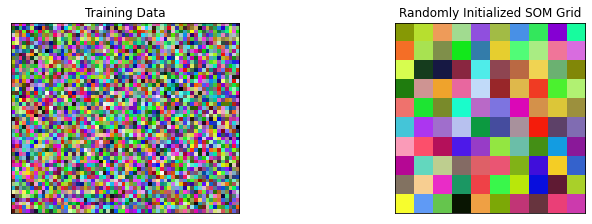

In [165]:
# Dimensions of the SOM grid
m = 10
n = 10
# Number of training examples
n_x = 3000
rand = np.random.RandomState(0)
# Initialize the training data
train_data = rand.randint(0, 255, (n_x, 3))
# Initialize the SOM randomly
som_weights = rand.randint(0, 255, (m, n, 3)).astype(float)
# Display both the training matrix and the SOM grid
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Training Data')
ax[1].imshow(som_weights.astype(int))
ax[1].title.set_text('Randomly Initialized SOM Grid')

In [166]:
#fig, ax = plt.subplots(
#   nrows=1, ncols=2, figsize=(15, 3.5), 
#  subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
som = SOM((10,10),3)
som.weights = som_weights
som.train(train_data,8)

epoch : 0
epoch : 1
epoch : 2
epoch : 3
epoch : 4
epoch : 5
epoch : 6
epoch : 7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


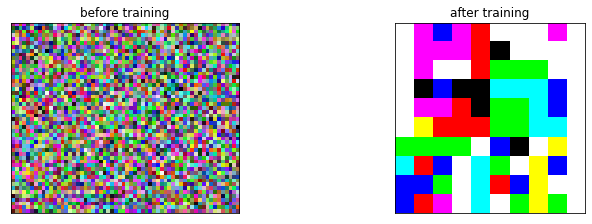

In [169]:
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('before training')
ax[1].imshow(som_weights.astype(int)+som.W_U)
ax[1].title.set_text('after training')